# Kernel Density Estimation

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# randomly generate 100 data points at 1-D for KDE
N = 100
np.random.seed(1)
Xkde = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

# display the data for density estimation
print("This is the dataset:\n {} \n".format(Xkde.flatten()))

This is the dataset:
 [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434
  0.90085595 -0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547
  4.30833925  4.60324647  4.3128273   4.15479436  4.32875387  4.9873354
  3.88268965  5.2344157   6.65980218  5.74204416  4.80816445  4.11237104
  4.25284171  6.6924546   5.05080775  4.36300435  5.19091548  7.10025514
  5.12015895  5.61720311  5.30017032  4.64775015  3.8574818   4.65065728
  4.79110577  5.58662319  5.83898341  5.93110208  5.28558733  5.88514116
  4.24560206  6.25286816  5.51292982  4.70190716  5.48851815  4.92442829
  6.13162939  6.51981682  7.18557541  3.60350366  3.55588619  4.49553414
  5.16003707  5.87616892  5.31563495  2.97779878  4.69379599  5.82797464
  5.23009474  5.76201118  4.777

### KDE using scikit-learn

Function: [***KernelDensity***](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) in scikit-learn

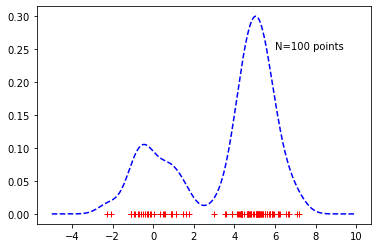

In [2]:
from sklearn.neighbors import KernelDensity

# perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Xkde)

# prepare the grid
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

# evaluate the log density model on the data using the KDE 
log_dens = kde.score_samples(X_plot)

# plot the data distribution and probability density function
plt.plot(X_plot[:, 0], np.exp(log_dens), 'b--')
plt.plot(Xkde[:, 0], np.zeros(Xkde.shape[0]), '+r')   
plt.text(6, 0.25, "N={0} points".format(N), horizontalalignment='left' )
plt.show()

#### Plot by seaborn

Function: [***displot***](https://seaborn.pydata.org/generated/seaborn.displot.html) in seaborn

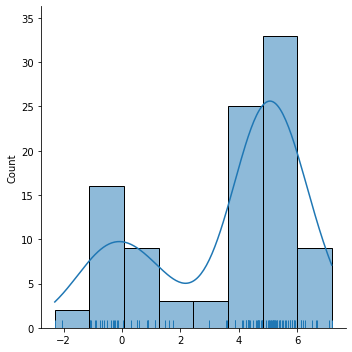

In [3]:
# the KDE and density profile can also be plotted via the seaborn package

import seaborn as sns
sns.displot(Xkde.flatten(), kde=True, rug=True)
plt.show()

#### Get the Probability Density Value

In [4]:
# Get the probability density value for a given datapoint xtest

xtest = 5.2   # given datapoint

# get the log-likelihood of the data samples from KDE
log_dens = kde.score_samples(np.asarray(xtest).reshape(-1,1))

# get PDF based on the log-likelihood 
pdf = np.exp(log_dens)
print("\n The probability density function value at {} is {:8.5f}".format(xtest, pdf[-1]) )


 The probability density function value at 5.2 is  0.29613


#### Get the Cumulative Distribution Function Value

In [5]:
# Compute cumulative distribution function (CDF) at a given datapoint

xtest = 5.2   # given datapoint

dx = 0.001  # define the step size

# generate values in the range from -100 (a sufficiently small number) to the test point
xgrid = np.arange(-100, xtest, dx).reshape(-1,1)   

# get the log-likelihood of the data samples from KDE
log_dens = kde.score_samples(xgrid)

# get PDF based on the log-likelihood 
pdf = np.exp(log_dens)

# approximate the integral of the PDF
cdf = np.sum(pdf * dx)

# print out the results
print("\n The cumulative density function value at {} is {:5.4f}".format(xtest, cdf) )
print("\n The probability density function value at {} is {:5.4f}".format(xtest, pdf[-1]) )


 The cumulative density function value at 5.2 is 0.6837

 The probability density function value at 5.2 is 0.2962


In [6]:
# An alternative way to run integration from -inf to xtest to compute CDF

xtest = 5.2   # given datapoint

start = -100 # pick a sufficiently small number to approximate -inf
Nsteps = 10000 # number of intervals between the "start" and the "xtest"

step = (xtest - start) / (Nsteps - 1)  # calculates the step size
xgrid = np.linspace(start, xtest, Nsteps)[:, np.newaxis]  # generate values in the range from -inf to the test point
log_dens = kde.score_samples(xgrid)   # get the log-likelihood of the data samples from KDE
pdf = np.exp(log_dens)  # get PDF values for each xgrid
cdf = np.sum(pdf * step)  # approximate the integral of the PDF

print("\n The cumulative density function value at {} is {:5.4f}".format(xtest, cdf) )
print("\n The probability density function value at {} is {:5.4f}".format(xtest, pdf[-1]) )


 The cumulative density function value at 5.2 is 0.6854

 The probability density function value at 5.2 is 0.2961


### KDE using SciPy

Function: [***integrate***](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) in SciPy

Function: [***gaussian_kde***](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) in SciPy

In [7]:
# The integral could be performed by SciPy package scipy.integrate
from scipy import integrate

# define a function
def func(x):
    """This function returns the probability density function value of a given query"""
    x_arr = np.asarray(x).reshape(-1,1)
    pdf = np.exp(kde.score_samples(x_arr))[0]
    return pdf
  
# SciPy's Integrate func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK.
cfd_scipy, error = integrate.quad(func, -np.inf, xtest)

print("\n The cumulative density function value at {} is {:5.4f}, using SciPy integral function".format(xtest, cfd_scipy) )


 The cumulative density function value at 5.2 is 0.6838, using SciPy integral function


In [8]:
import scipy.stats

kde = scipy.stats.gaussian_kde(list(Xkde.flatten()) )

print(kde.pdf(xtest))

cdf = kde.integrate_box_1d(-100, xtest)

print("\n The cumulative density function value at {} is {:5.4f}".format(xtest, cdf) )

[0.21479941]

 The cumulative density function value at 5.2 is 0.6717


# Regression of Simple Datasets

### Linear Regression

Function: [***LinearRegression***](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) in scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression


X_LR = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y_LR = np.dot(X_LR, np.array([1, 2])) + 3


# display the data for density estimation
print("This is the dataset:\n X =\n {} \n \n y = {} \n".format(X_LR, y_LR))

# Linear regression model

lin_reg = LinearRegression().fit(X_LR, y_LR)

# output R^2 of the 
print(lin_reg.score(X_LR, y_LR))
# output the coefficients in the regression model
print(lin_reg.coef_)
# output the constant term "b" in the regression model
print(lin_reg.intercept_)

# to print out all these terms together 
print("\nThe regressed model is y ={:3.1f}X0 +{:3.1f}X1 +{:3.1f} with a R2 score of {} \n".format(lin_reg.coef_[0], 
                                                                                                  lin_reg.coef_[1], 
                                                                                                  lin_reg.intercept_,
                                                                                                  lin_reg.score(X_LR, y_LR)))

# make a prediction on the new test data, xtest
X_LR_test = np.array([[1, 3]])
y_LR_test = lin_reg.predict(X_LR_test)

print("With the input of {}, the regression model predicts y = {}".format(str(X_LR_test), y_LR_test[0])) 

This is the dataset:
 X =
 [[1 1]
 [1 2]
 [2 2]
 [2 3]] 
 
 y = [ 6  8  9 11] 

1.0
[1. 2.]
3.0000000000000018

The regressed model is y =1.0X0 +2.0X1 +3.0 with a R2 score of 1.0 

With the input of [[1 3]], the regression model predicts y = 10.0


### Ridge Regression

Function: [***Ridge***](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) in scikit-learn

In [10]:
# Ridge regression
from sklearn.linear_model import Ridge

# randomly generate the data; X is 10 x 3 matrix, and y is a 10-dimensional vector
X_RR = np.random.rand(10, 3)
y_RR = np.random.rand(10)

# perform ridge regression using \alpha, which is the regularization strength
ridge_reg = Ridge(alpha=1.0).fit(X_RR, y_RR)

# make a prediction on the new test data, xtest
X_RR_test = np.array([[1, 2, 3]])
ridge_reg.predict(X_RR_test)

array([0.09215076])

### Gaussian Process

Function: [***GaussianProcessRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html) in scikit-learn

The Gaussian process regression value at 5.2 is 1.1669



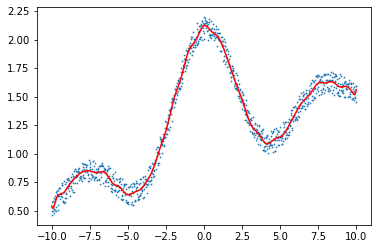

In [11]:
# Gaussian process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# generate 1000 data randomly using a "real" function for X-Y mapping
n = 1000
X_GP = np.linspace(-10, 10, num=n)
y_GP = 1 + X_GP*5E-2 + np.sin(X_GP)/X_GP + 0.2*np.random.rand(n)

# fit a Gaussian process model using the default kernel
gp_reg = GaussianProcessRegressor()
gp_reg.fit(X_GP.reshape(-1,1), y_GP)

# given datapoint
X_GP_test = 5.2   
# get the regression prediction value of this test data point
y_GP_test = gp_reg.predict(np.asarray(X_GP_test).reshape(-1,1))
print("The Gaussian process regression value at {} is {:5.4f}\n".format(X_GP_test, y_GP_test[0]) )

# plot out the regressed value of the entire domain
y_GP_pred = gp_reg.predict(X_GP.reshape(-1,1))
plt.scatter(X_GP, y_GP,s=0.5)
plt.plot(X_GP, y_GP_pred,c='r')
plt.show()

# Regression of the Diabetes Dataset

Function: [***datasets***](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) in scikit-learn

There are 342 instances in this dataset.


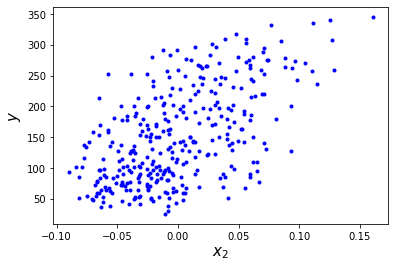

In [12]:
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Select the second feature corresponding to the bmi of the diabetes patients
X=X[:,2].reshape((len(y),1))
y = y.reshape((len(y),1))

# Split the data into training/testing sets
X = X[:-100]          # use all but the last 100 data for training
X_test = X[-100:]     # use the last 100 data for testing 

# Split the targets into training/testing sets
y = y[:-100]         # use all but the last 100 data for training
y_test = y[-100:]    # use the last 100 data for testing 
dim = len(y)
print("There are "+str(dim)+" instances in this dataset.")

# Visualize the data
plt.plot(X, y, "b.")
plt.xlabel("$x_2$", fontsize=15)
plt.ylabel("$y$", fontsize=15)
plt.show()

### Linear Regression with the Normal Equation

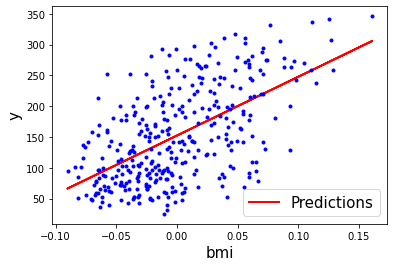

In [13]:
# Add a column of '1' vector to the X matrix
X_exp = np.c_[np.ones((dim, 1)), X]

theta = np.linalg.inv(X_exp.T.dot(X_exp)).dot(X_exp.T).dot(y)
y_predict = X_exp.dot(theta)

# Plot the regression results
plt.plot(X, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("bmi", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.show()

### Linear Regression using Batch Gradient Descent

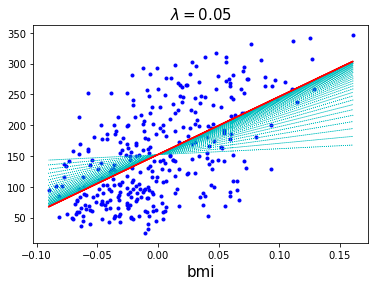

In [14]:
lbda = 0.05   # set the learning rate

theta = np.random.randn(2,1)   # initialize theta
#theta[1,:]=0

plt.plot(X, y, "b.")

n_iterations = 20000   # Maximum iteration numbers

for iteration in range(n_iterations):
    if iteration%500 == 0 and iteration > 10:
        y_predict = X_exp.dot(theta)
        plt.plot(X, y_predict, "c:", linewidth=0.8 )    
    gradient = 2/dim * X_exp.T.dot(X_exp.dot(theta) - y)
    theta = theta - lbda * gradient
    
y_predict = X_exp.dot(theta)

plt.plot(X, y_predict, "r-")
plt.xlabel("bmi", fontsize=15)  
plt.title(r"$\lambda = {}$".format(lbda), fontsize=15)
plt.show()

In [15]:
# define a function to perform the  gradient descent and plotting tasks

def plot_gradient_descent(theta, lbda):
    plt.plot(X, y, "b.")
    n_iterations = 20000
    thetas = []            # collection of all theta values over the iterations
    
    for iteration in range(n_iterations):
        if iteration%500 == 0 and iteration >0:
            y_predict = X_exp.dot(theta)
            plt.plot(X, y_predict, "c:", linewidth=0.8 )    
        gradient = 2/dim * X_exp.T.dot(X_exp.dot(theta) - y)
        theta = theta - lbda * gradient
        thetas.append(theta)
        
    y_predict = X_exp.dot(theta)
    plt.plot(X, y_predict, "r-")
    plt.xlabel("bmi", fontsize=15)
    
    plt.title(r"$\lambda = {}$".format(lbda), fontsize=15)
    return thetas

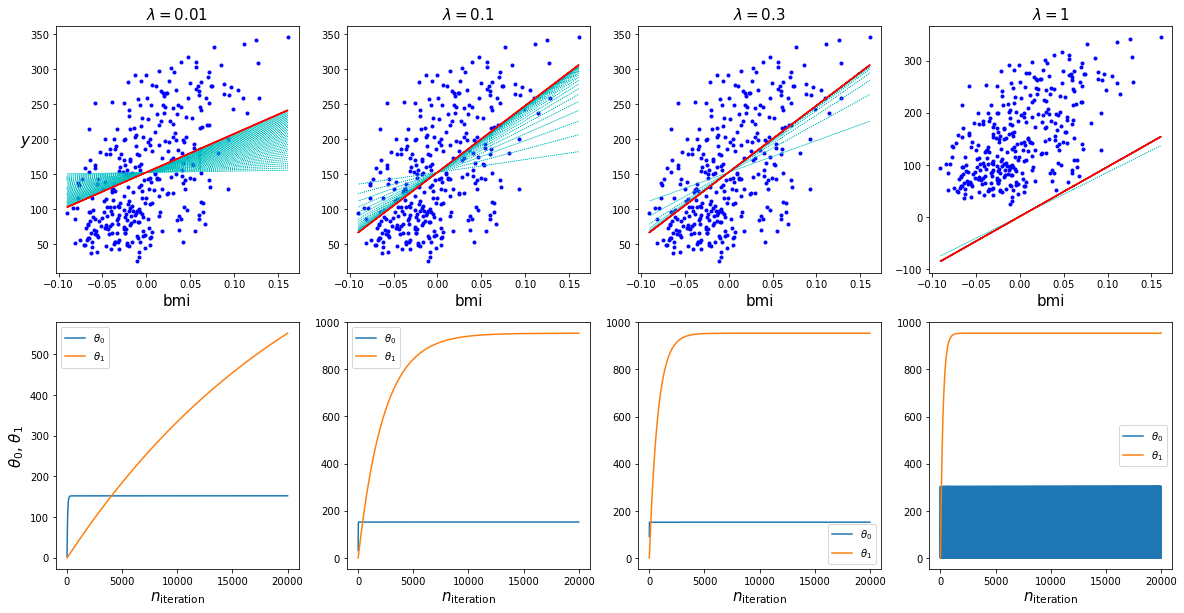

In [16]:
# Initialize theta
theta = np.random.randn(2,1)

plt.figure(figsize=(20,10))

plt.subplot(241)
plt.ylabel("$y$", rotation=0, fontsize=15)
predictions_010 = plot_gradient_descent(theta, lbda=0.01)
plt.subplot(242)
predictions_100 = plot_gradient_descent(theta, lbda=0.1)
plt.subplot(243)
predictions_300 = plot_gradient_descent(theta, lbda=0.3)
plt.subplot(244)
predictions_1000 = plot_gradient_descent(theta, lbda=1)

plt.subplot(245)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
plt.ylabel("$\\theta_0$, $\\theta_1$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_010])
theta1, = plt.plot([i[1] for i in predictions_010])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])
plt.subplot(246)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_100])
theta1, = plt.plot([i[1] for i in predictions_100])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])
plt.subplot(247)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_300])
theta1, = plt.plot([i[1] for i in predictions_300])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])
plt.subplot(248)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_1000])
theta1, = plt.plot([i[1] for i in predictions_1000])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])

plt.show()

### Linear Regression using Stochastic Gradient Descent

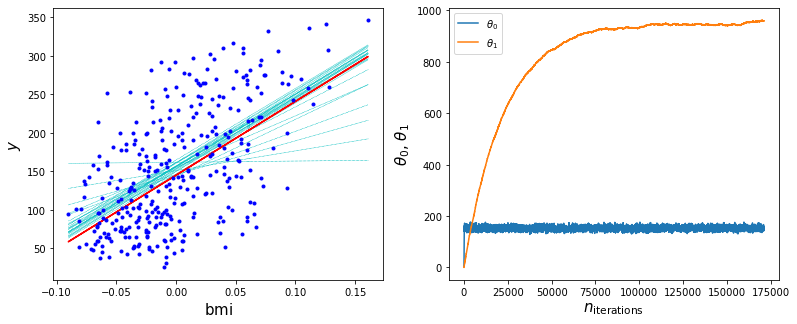

In [17]:
# Stochastic Gradient Descent

n_epochs = 500   # number of epochs

lbda = 0.01   # set the learning rate
        
thetas = []

plt.figure(figsize=(13, 5))
plt.subplot(121)

# loop over the number of epochs
for epoch in range(n_epochs):
    # And a loop over the size of the training data
    for i in range(dim):
        # Pick a random data instance as xi, yi
        random_index = np.random.randint(dim)
        xi = X_exp[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # Calculate gradients based on this data instance
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - lbda * gradients
        thetas.append(theta)
    # plot a line for every few epochs
    if epoch%20 == 0:
        y_predict = X_exp.dot(theta)
        plt.plot(X, y_predict, "c:", linewidth=0.5 )    

y_predict = X_exp.dot(theta)

plt.plot(X, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$\mathrm{bmi}$", fontsize=15)
plt.ylabel("$y$", fontsize=15)

plt.subplot(122)
theta0, = plt.plot([i[0] for i in thetas])
theta1, = plt.plot([i[1] for i in thetas])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])

plt.xlabel("$n_{\mathrm{iterations}}$", fontsize=15)
plt.ylabel("$\\theta_0$, $\\theta_1$", fontsize=15)
plt.show()

### Linear Regression with Ridge Regularization

Function: [***train_test_split***](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) in scikit-learn

Function: [***mean_squared_error***](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) in scikit-learn

In [18]:
# Prepare the training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Add a column of '1' vector to the X matrix
X_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_test = np.c_[np.ones((len(X_test), 1)), X_test]

# Estimate theta values
theta = np.linalg.inv(np.transpose(X_train).dot(X_train)).dot(X_train.T).dot(y_train)

# Check the performance on the test dataset
from sklearn.metrics import mean_squared_error

y_predict = X_test.dot(theta)
mse_linreg = mean_squared_error(y_predict, y_test)
print("MSE = %s" % mse_linreg)

MSE = 5366.446329251444


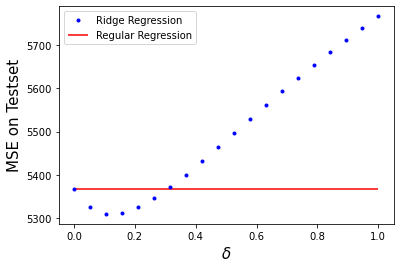

In [19]:
# Ridge Regression

thetas_r = []
mses = []
deltas = np.linspace(0, 1, 20)

for delta in deltas:
    # Compute estimators
    theta = np.linalg.inv(X_train.T.dot(X_train)+delta*np.eye(np.shape(X_train)[1])).dot(X_train.T).dot(y_train)
    thetas_r.append(theta)
    # Compute their MSE
    mses.append(mean_squared_error(X_test.dot(theta), y_test))
    
plt.plot(deltas,mses,'b.', label="Ridge Regression")
plt.hlines(mse_linreg, 0, 1, "r", label="Regular Regression")
plt.xlabel("$\delta$", fontsize=15)
plt.ylabel("MSE on Testset", fontsize=15)
plt.legend()
plt.show()

### Linear Regression with LASSO Regularization

Function: [***Lasso***](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) in scikit-learn

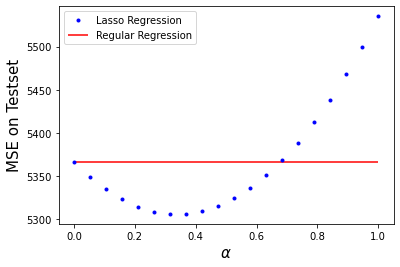

In [20]:
# Lasso Regression

from sklearn.linear_model import Lasso
thetas_l = []
mses = []
alphas = np.linspace(0.00001, 1, 20)

for alpha in alphas:
    lasso_reg = Lasso(alpha)
    # Compute estimators
    lasso_reg.fit(X_train, y_train)
    thetas_l.append(lasso_reg.coef_)
    # Compute their MSE
    mses.append(mean_squared_error(lasso_reg.predict(X_test), y_test))
    
plt.plot(alphas,mses,'b.', label="Lasso Regression")
plt.hlines(mse_linreg, 0, 1, "r", label="Regular Regression")
plt.xlabel(r"$\alpha$", fontsize=15)
plt.ylabel("MSE on Testset", fontsize=15)
plt.legend()
plt.show()